In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
sns.set()
%matplotlib inline

In [2]:
movies=pd.read_csv('movies.csv',encoding='ISO-8859-1')

In [3]:
movies.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [4]:
movies_edit=movies.copy(deep=True)

In [5]:
movies_edit.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


#### This set has:
##### 1.Numerical variables:budget,gross,runtime,score,votes
##### 2.Categorical variables:country,genre,company,writer,star,rating,director
##### 3.Dates: year,released

## Questions:
#### 1) No of movies released per year
#### 2.Find out the Oldest movie and the company that released the movie. Check out all the movies that the company has released and see the trend in score
#### 3. Top 3 Companies with the most number of released movies
#### 4.avg score that each of these companies get for their movies
#### 5. Let us also look at the avg gross revenue of the three companies
#### 6. Correlation analysis
#### 7. Movies with score above 8
#### 8.Let us see which director is the most consistent in terms of quality of movie
#### 9.Which genre has the most number of 8.0 and above score
#### 10. Movie stars who have starred in the most number of 8.0 and above score movies
#### 11.Top 3 Countries with the most number of movies released

##### Check for missing values

<AxesSubplot:>

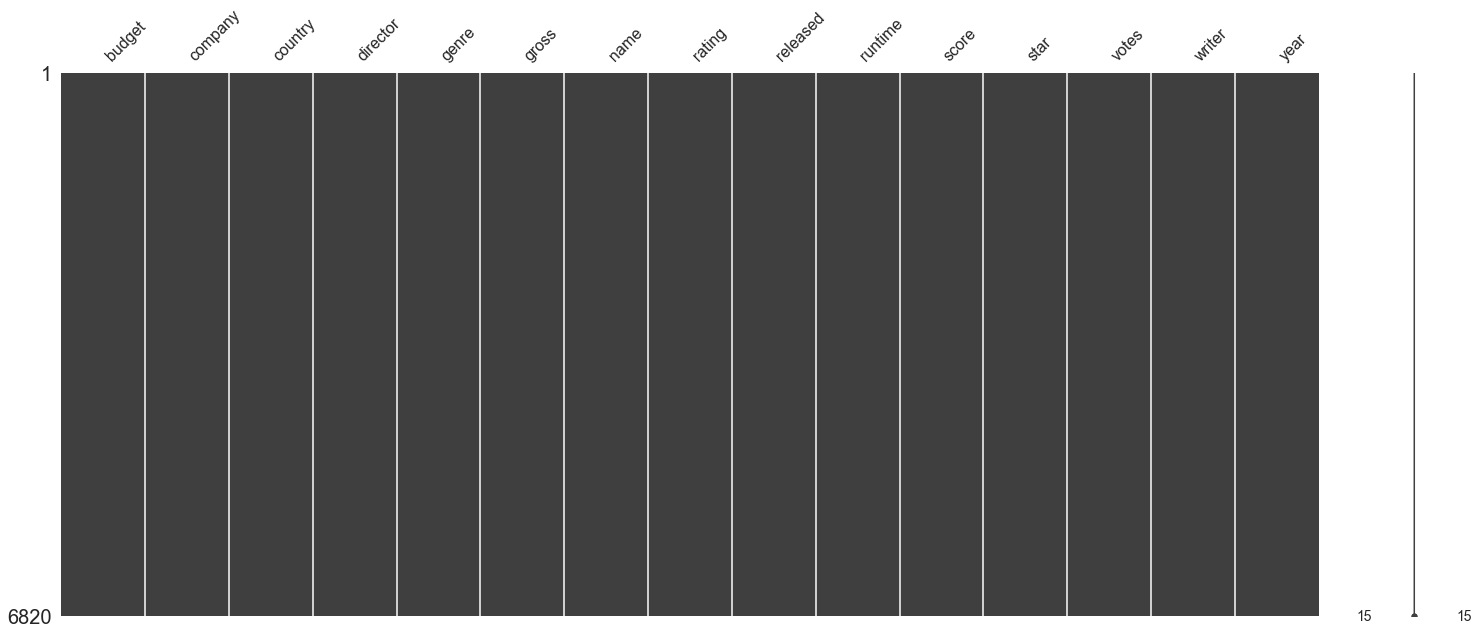

In [6]:
msno.matrix(movies)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB


#### ~There are no missing values in any of the columns

#### Convert "released" datatype to datetime

In [8]:
movies_edit['released']=pd.to_datetime(movies_edit['released'])

In [9]:
movies_edit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   budget    6820 non-null   float64       
 1   company   6820 non-null   object        
 2   country   6820 non-null   object        
 3   director  6820 non-null   object        
 4   genre     6820 non-null   object        
 5   gross     6820 non-null   float64       
 6   name      6820 non-null   object        
 7   rating    6820 non-null   object        
 8   released  6820 non-null   datetime64[ns]
 9   runtime   6820 non-null   int64         
 10  score     6820 non-null   float64       
 11  star      6820 non-null   object        
 12  votes     6820 non-null   int64         
 13  writer    6820 non-null   object        
 14  year      6820 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 799.3+ KB


#### Sumary statistics for numerical variables 

In [10]:
movies_edit.describe()

,budget,gross,runtime,score,votes,year
count,6.820000e+03,6.820000e+03,6820.00000,6820.000000,6.820000e+03,6820.000000
mean,2.458113e+07,3.349783e+07,106.55132,6.374897,7.121952e+04,2001.000293
std,3.702254e+07,5.819760e+07,18.02818,1.003142,1.305176e+05,8.944501
min,0.000000e+00,7.000000e+01,50.00000,1.500000,2.700000e+01,1986.000000
25%,0.000000e+00,1.515839e+06,95.00000,5.800000,7.665250e+03,1993.000000
50%,1.100000e+07,1.213568e+07,102.00000,6.400000,2.589250e+04,2001.000000
75%,3.200000e+07,4.006534e+07,115.00000,7.100000,7.581225e+04,2009.000000
max,3.000000e+08,9.366622e+08,366.00000,9.300000,1.861666e+06,2016.000000


#### ~The average film duration is 1hr 46 mins
#### ~This dataset contains information ranging from 1986 - 2016
#### ~The average rating for the movies present in this dataset is 6.3

#### Check if the values of the year column matches with the year in released column

In [11]:
movies_edit[movies_edit['released'].dt.year!=movies_edit['year']]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
29,1900000.0,Hemdale,USA,Tim Hunter,Crime,4600000.0,River's Edge,R,1987-05-08,99,7.1,Crispin Glover,12862,Neal Jimenez,1986
50,111000.0,Maljack Productions,USA,John McNaughton,Biography,609939.0,Henry: Portrait of a Serial Killer,UNRATED,1990-09-07,83,7.0,Michael Rooker,25367,Richard Fire,1986
60,6000000.0,De Haven Productions,UK,David Anspaugh,Drama,28607524.0,Hoosiers,PG,1987-02-27,114,7.6,Gene Hackman,36604,Angelo Pizzo,1986
85,0.0,Fuji Television Network,Japan,Masanori Hata,Adventure,13245219.0,The Adventures of Milo and Otis,G,1989-08-25,90,7.1,Kyôko Koizumi,9178,Masanori Hata,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6785,21500000.0,42,UK,Eran Creevy,Action,2280004.0,Collide,PG-13,2017-02-24,99,5.7,Nicholas Hoult,9617,F. Scott Frazier,2016
6791,0.0,AZ Films,Chile,Pablo Larraín,Biography,938875.0,Neruda,R,2017-03-10,107,7.0,Gael García Bernal,5680,Guillermo Calderón,2016
6802,0.0,Mandarin Films,France,François Ozon,Drama,880474.0,Frantz,PG-13,2017-03-15,113,7.5,Pierre Niney,6634,François Ozon,2016
6813,0.0,Anna Biller Productions,USA,Anna Biller,Comedy,228894.0,The Love Witch,UNRATED,2017-03-10,120,6.2,Samantha Robinson,6054,Anna Biller,2016


#### ~released year column has year value that doesnt match with the corresponding year value column 

In [12]:
movies_edit.loc[movies_edit['released'].dt.year!=movies_edit['year'],'year']=movies_edit.loc[movies_edit['released'].dt.year!=movies_edit['year']]['released'].dt.year

In [13]:
movies_edit[movies_edit['released'].dt.year!=movies_edit['year']]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year


In [14]:
movies_edit.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1987
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


#### ~ Now the released column has year value that matches with the corresponding values of  year column 

#### 1)No of movies released per year

In [15]:
movies_edit.groupby("year")['year'].count()

year
1986    194
1987    204
1988    220
1989    214
1990    213
1991    230
1992    193
1993    225
1994    221
1995    231
1996    221
1997    213
1998    223
1999    216
2000    213
2001    217
2002    226
2003    231
2004    209
2005    211
2006    217
2007    232
2008    235
2009    203
2010    210
2011    225
2012    224
2013    221
2014    220
2015    234
2016    218
2017     56
Name: year, dtype: int64

#### ~ Approximately Same no of movies are released every year

#### 2.Find out the Oldest movie and the company that released the movie. Check out all the movies that the company has released and see the trend in score
            

In [16]:
oldest=movies_edit.sort_values('released')
oldest[['name','company','released']][:1]

,name,company,released
96,Black Moon Rising,New World Pictures,1986-01-10


#### ~Black Moon Rising is the oldest film and New World Picture was the company that made the film

In [17]:
oldest_company_set=movies_edit[movies_edit['company']=='New World Pictures']

In [18]:
oldest_company_set

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
96,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986
280,0.0,New World Pictures,USA,Ethan Wiley,Comedy,7800000.0,House II: The Second Story,PG-13,1987-08-28,88,5.4,Arye Gross,8302,Fred Dekker,1987
347,0.0,New World Pictures,USA,Gary Sherman,Action,7555000.0,Wanted: Dead or Alive,R,1987-01-16,106,5.9,Rutger Hauer,3328,Michael Patrick Goodman,1987
439,0.0,New World Pictures,USA,Robert Altman,Comedy,790000.0,Beyond Therapy,R,1987-04-01,93,4.7,Julie Hagerty,944,Christopher Durang,1987
445,3000000.0,New World Pictures,USA,Michael Lehmann,Comedy,1108462.0,Heathers,R,1989-03-31,103,7.3,Winona Ryder,67238,Daniel Waters,1989
727,7000000.0,New World Pictures,USA,Steve Miner,Action,9094451.0,Warlock,R,1991-01-11,103,6.2,Julian Sands,12449,David Twohy,1991
926,0.0,New World Pictures,USA,Tony Scott,Action,15650000.0,Revenge,R,1990-02-16,124,6.2,Kevin Costner,13517,Jim Harrison,1990


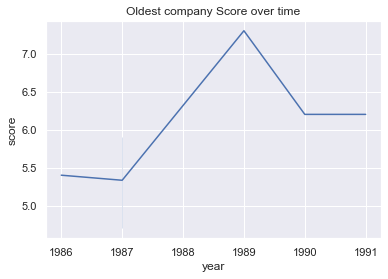

In [20]:
sns.lineplot(data=oldest_company_set,x='year',y='score').set_title('Oldest company Score over time');

#### ~ New World Pictures had better scores as time passed.

#### 3. Top 3 Companies with the most released movies

In [41]:
movies_edit['company'].value_counts()[:3]

Universal Pictures    302
Warner Bros.          294
Paramount Pictures    259
Name: company, dtype: int64

#### ~Top 3 companies with the most released movies are 'Universal Pictures', 'Warner Bros.', 'Paramount Pictures'.

#### 4.avg score that each of these companies get for their movies

In [21]:
top_company_info=movies_edit[movies_edit['company'].isin(['Universal Pictures','Warner Bros.','Paramount Pictures'])]

In [22]:
top_company_info.shape

(855, 15)

In [23]:
top_company_info.groupby('company')['score'].median()

company
Paramount Pictures    6.30
Universal Pictures    6.40
Warner Bros.          6.45
Name: score, dtype: float64

<AxesSubplot:xlabel='company', ylabel='score'>

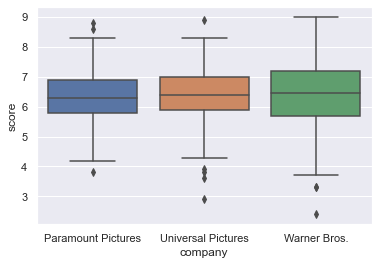

In [24]:
sns.boxplot(x='company',y='score',data=top_company_info)

#### ~The average score these companies get is around  6.3
#### ~ According to the boxplot Warner Bros seems to be getting higher scores for their movies since the upper whisker is at 9. There is also higher variablity in Warner Bros compared to Paramount Pictures and Universal Pictures Company

#### 5. Let us also look at the avg gross revenue of the three companies

In [25]:
top_company_info.groupby('company')['gross'].mean()

company
Paramount Pictures    6.608379e+07
Universal Pictures    6.433792e+07
Warner Bros.          7.252489e+07
Name: gross, dtype: float64

#### ~ Warner Bros are averaging a higher gross revenue compared to the other two companies

#### 6. Correlation analysis

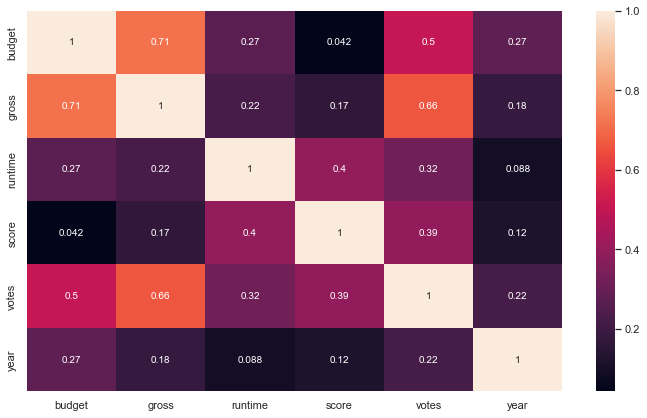

In [43]:
sns.heatmap(movies_edit.corr(), annot = True)
plt.gcf().set_size_inches(12, 7)
plt.show()

#### ~We see that gross and budget have a moderately positive correlation and so does gross and votes 

#### 7. Movies with score above 8

In [27]:
high_score_set=movies_edit.query('score>7.9')
desc_sorted_score=high_score_set.sort_values('score',ascending=False)
desc_sorted_score[['country','director','name','score']]

,country,director,name,score
1760,USA,Frank Darabont,The Shawshank Redemption,9.3
4840,USA,Christopher Nolan,The Dark Knight,9.0
1542,USA,Steven Spielberg,Schindler's List,8.9
1761,USA,Quentin Tarantino,Pulp Fiction,8.9
3743,USA,Peter Jackson,The Lord of the Rings: The Return of the King,8.9
...,...,...,...,...
3741,USA,Gore Verbinski,Pirates of the Caribbean: The Curse of the Bla...,8.0
3597,Spain,Pedro Almodóvar,Talk to Her,8.0
3439,France,Danis Tanovic,Tierra de nadie,8.0
3303,France,David Lynch,Mulholland Drive,8.0


#### ~Shawshank Redemption has the highest score 
#### ~There are 240 movies with a score greater than or equal to 8.0

#### 8.Let us see which director is the most consistent in terms of quality of movie

In [28]:
desc_sorted_score['director'].value_counts()[:10]

Christopher Nolan    7
Quentin Tarantino    6
Martin Scorsese      5
Steven Spielberg     5
Clint Eastwood       4
David Fincher        3
Brad Bird            3
Pete Docter          3
Hayao Miyazaki       3
Peter Jackson        3
Name: director, dtype: int64

#### ~Christopher Nolan seems to have the most 8.0 above rating movies among the directors.But that could be because he has produced many films.So let us find out how many movies each of the top directors filmed and also the percentage of 8.0 above rated movies to check for consistency

In [29]:
top_directors={'Christopher Nolan':0,'Quentin Tarantino':0,'Martin Scorsese':0,'Steven Spielberg':0}
for i in top_directors.keys():
    dir_movies=movies_edit[movies_edit['director']==i]
    no_of_movies=len(dir_movies)
    print('The number of movies that',''.join(dir_movies['director'].unique()),'produced =',no_of_movies)
    percentt=(len(dir_movies.query('score>7.9'))/len(dir_movies))*100
    top_directors[i]=percentt
display(top_directors)
for i,j in top_directors.items():
    print('The percentage of movies that',i,'has produced that are above 8.0 score is',j,'%')

The number of movies that Christopher Nolan produced = 9
The number of movies that Quentin Tarantino produced = 8
The number of movies that Martin Scorsese produced = 15
The number of movies that Steven Spielberg produced = 21


{'Christopher Nolan': 77.77777777777779,
 'Quentin Tarantino': 75.0,
 'Martin Scorsese': 33.33333333333333,
 'Steven Spielberg': 23.809523809523807}

The percentage of movies that Christopher Nolan has produced that are above 8.0 score is 77.77777777777779 %
The percentage of movies that Quentin Tarantino has produced that are above 8.0 score is 75.0 %
The percentage of movies that Martin Scorsese has produced that are above 8.0 score is 33.33333333333333 %
The percentage of movies that Steven Spielberg has produced that are above 8.0 score is 23.809523809523807 %


#### ~Chritopher Nolan and Quentin Tarantino seem to be very consistent in the quality of films they produce .But they also havent produced too many films


#### 9.Which genre has the most number of 8.0 and above score

[Text(0.5, 0, 'No of genre above 8')]

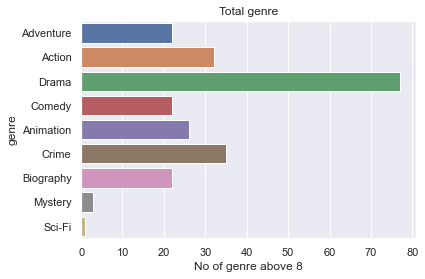

In [30]:
g=sns.countplot(y='genre',data=high_score_set)
g.set_title('Total genre')
g.set(xlabel='No of genre above 8')

#### ~We see that Drama genre has the most number of 8.0 and above score

#### 10. Movie stars who have starred in the most number of 8.0 and above score movies

In [31]:
high_score_set['star'].value_counts()

Leonardo DiCaprio     7
Aamir Khan            6
Tom Hanks             5
Christian Bale        4
Russell Crowe         3
                     ..
Eli Marienthal        1
Richard Farnsworth    1
Hossein Mahjoub       1
Ellen Burstyn         1
Ferdia Walsh-Peelo    1
Name: star, Length: 194, dtype: int64

#### ~ Leonardo Dicaprio has starred in the most number of 8.0 above score movies 

#### 11.Top 3 Countries with the most number of movies released

In [32]:
top_countries=movies_edit['country'].value_counts(ascending=False)[:3]
top_countries

USA       4872
UK         698
France     283
Name: country, dtype: int64

#### ~USA,UK,France are the countries with the most number of movies released

In [33]:

top_country_info=movies_edit[movies_edit['country'].isin(['USA','UK','France'])]

<AxesSubplot:xlabel='country', ylabel='count'>

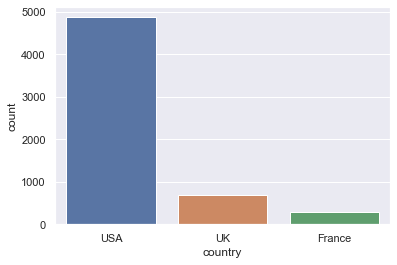

In [34]:
sns.countplot(x='country',data=top_country_info)

## Conclusions
#### ~The average film duration is 1hr 46 mins
#### ~This dataset contains information ranging from 1986 - 2016
#### ~The average rating for the movies present in this dataset is 6.3
#### ~ Approximately Same no of movies are released every year
#### ~Black Moon Rising is the oldest film and New World Picture was the company that made the film.New World Pictures had better scores as time passed.
#### ~Top 3 companies with the most released movies are 'Universal Pictures', 'Warner Bros.', 'Paramount Pictures'.
#### ~The average score these companies get is around  6.3
#### ~ According to the boxplot Warner Bros seems to be getting higher scores for their movies since the upper whisker is at 9. There is also higher variablity in Warner Bros compared to Paramount Pictures and Universal Pictures Company
#### ~ Warner Bros are averaging a higher gross revenue compared to the other two companies
#### ~We see that gross and budget have a moderately positive correlation and so does gross and votes 
#### ~Shawshank Redemption has the highest score 
#### ~There are 240 movies with a score greater than or equal to 8.0
#### ~Christopher Nolan seems to have the most 8.0 above rating movies among the directors.But that could be because he has produced many films.So let us find out how many movies each of the top directors filmed and also the percentage of 8.0 above rated movies to check for consistency.
#### ~Chritopher Nolan and Quentin Tarantino seem to be very consistent in the quality of films they produce .But they also havent produced too many films
#### ~We see that Drama genre has the most number of 8.0 and above score
#### ~ Leonardo Dicaprio has starred in the most number of 8.0 aboce score movies 
#### ~USA,UK,France are the countries with the most number of movies released
